In [1]:
import numpy as np
import awkward as ak
import uproot
import src.functions as fn
from pylab import cm
import matplotlib.pyplot as plt
import src.Network as net
import sys
import time
from mpl_toolkits.mplot3d import Axes3D
import scipy.stats
import networkx as nx
from mpl_toolkits.axes_grid1 import make_axes_locatable
import hist

In [2]:
fileName="/eos/user/c/chpapage/CloseBySingleGamma_E1to5Eta1p62Delta10/hgcalNtuple.root"
file=uproot.open(fileName)

incFileName="/afs/cern.ch/user/d/dmagdali/CernCentralityProject/tracksters_ds_200e.root"
incFile=uproot.open(incFileName)

In [3]:
folder="/eos/user/d/dmagdali/figures/"

In [4]:
print(file['ana/tracksters'].keys())
tracksters=file['ana/tracksters']

['event', 'NClusters', 'NTracksters', 'time', 'timeError', 'regressed_energy', 'raw_energy', 'raw_em_energy', 'raw_pt', 'raw_em_pt', 'barycenter_x', 'barycenter_y', 'barycenter_z', 'trackster_barycenter_eta', 'trackster_barycenter_phi', 'EV1', 'EV2', 'EV3', 'eVector0_x', 'eVector0_y', 'eVector0_z', 'sigmaPCA1', 'sigmaPCA2', 'sigmaPCA3', 'id_probabilities', 'vertices_indexes', 'vertices_x', 'vertices_y', 'vertices_z', 'vertices_energy', 'vertices_correctedEnergy', 'vertices_correctedEnergyUncertainty', 'vertices_multiplicity', 'vertices_layer', 'recHits_indexes', 'recHits_x', 'recHits_y', 'recHits_z', 'recHits_energy', 'recHits_waferU', 'recHits_waferV', 'recHits_cellU', 'recHits_cellV', 'layer_cluster_seed']


In [5]:
vertices_x_com=ak.flatten(tracksters['vertices_x'].array())
vertices_y_com=ak.flatten(tracksters['vertices_y'].array())
vertices_z_com=ak.flatten(tracksters['vertices_z'].array())
vertices_ind_com=ak.flatten(tracksters['vertices_indexes'].array())
vertices_E_com=ak.flatten(tracksters['vertices_energy'].array())


In [6]:
print(vertices_E_com)

[[0.417, 0.611, 0.485, 0.252, 0.0675, 0.126, ... 0.139, 0.429, 0.171, 0.0993, 0.149]]


In [7]:
N=len(ak.flatten(ak.count(tracksters['vertices_indexes'].array(),axis=-1)))

In [8]:
incFile['tracksters'].keys()

['nvertices_x',
 'vertices_x',
 'nvertices_y',
 'vertices_y',
 'nvertices_z',
 'vertices_z',
 'nvertices_energy',
 'vertices_energy',
 'nvertices_indexes',
 'vertices_indexes',
 'trackster_label',
 'trackster_event']

In [9]:
tracksters_inc=incFile['tracksters']

In [10]:
vertices_x_ed=tracksters_inc['vertices_x'].array()
vertices_y_ed=tracksters_inc['vertices_y'].array()
vertices_z_ed=tracksters_inc['vertices_z'].array()
vertices_ind_ed=tracksters_inc['vertices_indexes'].array()
vertices_E_ed=tracksters_inc['vertices_energy'].array()
vertices_label_ed=tracksters_inc['trackster_label'].array()

In [11]:
N=np.random.randint(0,14445,2000)
vertices_x_inc=vertices_x_ed[vertices_label_ed==0][N]
vertices_y_inc=vertices_y_ed[vertices_label_ed==0][N]
vertices_z_inc=vertices_z_ed[vertices_label_ed==0][N]
vertices_ind_inc=vertices_ind_ed[vertices_label_ed==0][N]
vertices_E_inc=vertices_E_ed[vertices_label_ed==0][N]

In [12]:
print(ak.sum(ak.sum(vertices_E_ed[vertices_label_ed==0],axis=-1)<5))
print(len(vertices_ind_ed[vertices_label_ed==0]))
print(ak.sum(ak.sum(vertices_E_ed[vertices_label_ed==0],axis=-1)<5)/len(vertices_ind_ed[vertices_label_ed==0]))

13679
14445
0.9469712703357563


In [13]:
print(len(vertices_x_inc))
print(sum(vertices_label_ed==0))

2000
14445


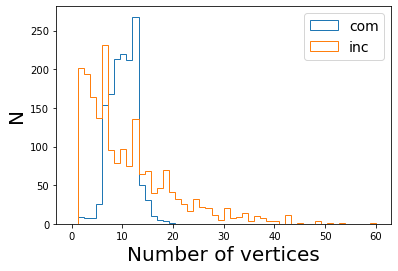

In [12]:
plt.hist(ak.flatten(ak.count(tracksters['vertices_indexes'].array(),axis=-1)),label="com",histtype="step",bins=50,range=(0,60))
plt.hist(ak.count(vertices_ind_inc,axis=-1),label="inc",histtype="step",bins=50,range=(0,60))
plt.xlabel("Number of vertices",fontsize=20)
plt.ylabel("N",fontsize=20)
plt.legend(fontsize=14)
#plt.show()
plt.savefig("/eos/user/d/dmagdali/figures/"+f"LowEComvsInc_NVert.png")

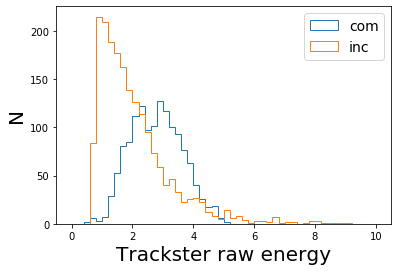

In [13]:
plt.hist(ak.flatten(tracksters['raw_energy'].array()),label="com",histtype="step",bins=50,range=(0,10))
plt.hist(ak.sum(vertices_E_inc,axis=-1),label="inc",histtype="step",bins=50,range=(0,10))
plt.legend()
plt.xlabel("Trackster raw energy",fontsize=20)
plt.ylabel("N",fontsize=20)
plt.legend(fontsize=14)
#plt.show()
plt.savefig("/eos/user/d/dmagdali/figures/"+f"LowEComvsInc_TotRawEnergy.png")

In [93]:
def plotTrackster(fig, ax, x, y, z, heatmap=None, indexes=None, edges=None, label='Vertex Energy (GeV)'):
    ax.set_xlabel('X (cm)')
    ax.set_ylabel('Y (cm)')
    ax.set_zlabel('Z (cm)')
    colmap = cm.ScalarMappable(cmap=cm.viridis)
    if len(heatmap) > 0 :
        colmap.set_array(heatmap)
        yg = ax.scatter(x, y, z, c=cm.viridis(heatmap/max(heatmap)), marker='o', linewidth=2)
        cb = fig.colorbar(colmap,label=label)
    else:
        yg =ax.scatter(x, y, z, marker='o') 
    edges=ak.to_numpy(edges)
    if len(heatmap) > 0:
        for ind in edges:
            idx0 = ak.where(indexes == ind[0])[0][0]
            idx1 = ak.where(indexes == ind[1])[0][0]
            ax.plot(
                [x[idx0] ,x[idx1]],
                [y[idx0] ,y[idx1]],
                [z[idx0] ,z[idx1]],
                'black'
            )
    plt.show()

2.446506515145302


<IPython.core.display.Javascript object>


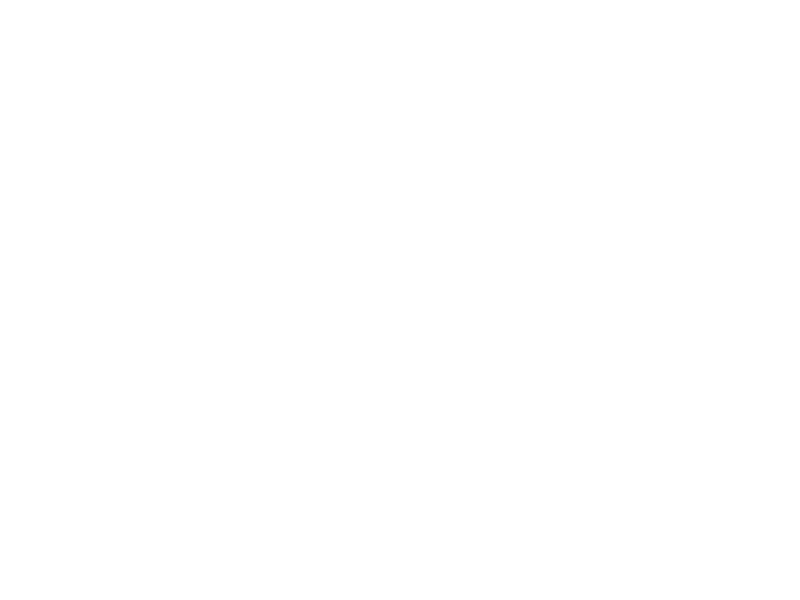

2.272881604731083


<IPython.core.display.Javascript object>


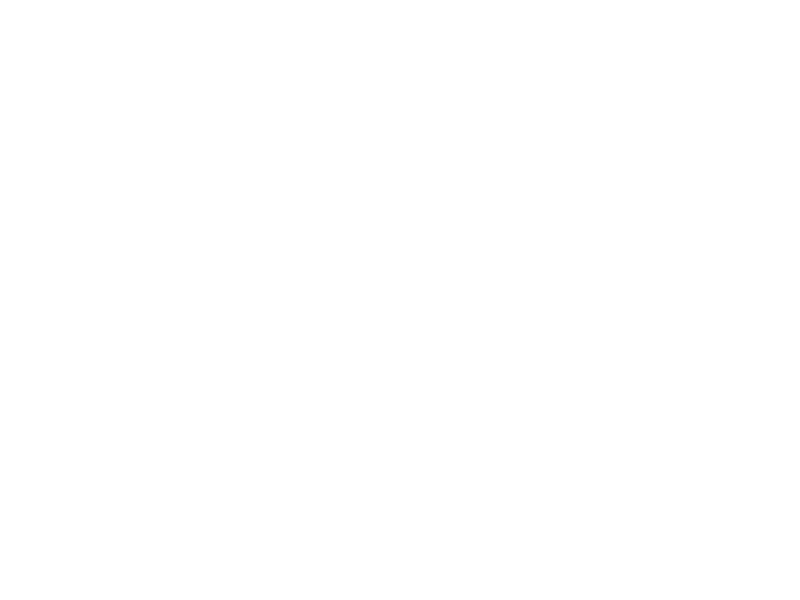

2.9395222142338753


<IPython.core.display.Javascript object>


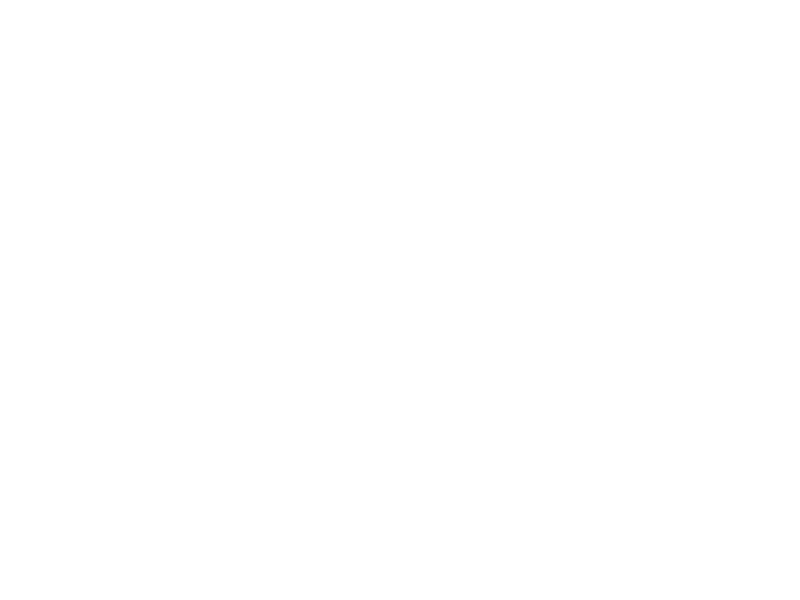

1.8786378726363182


<IPython.core.display.Javascript object>


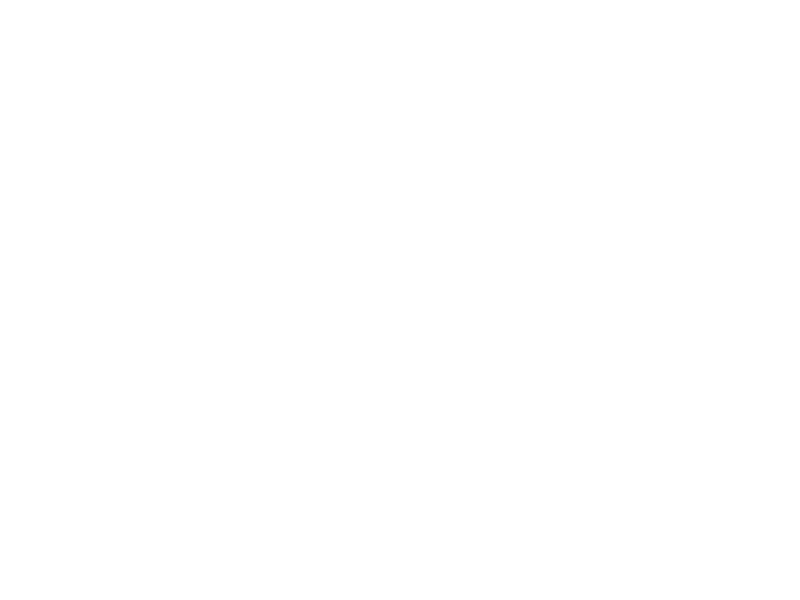

3.9835226871073246


<IPython.core.display.Javascript object>


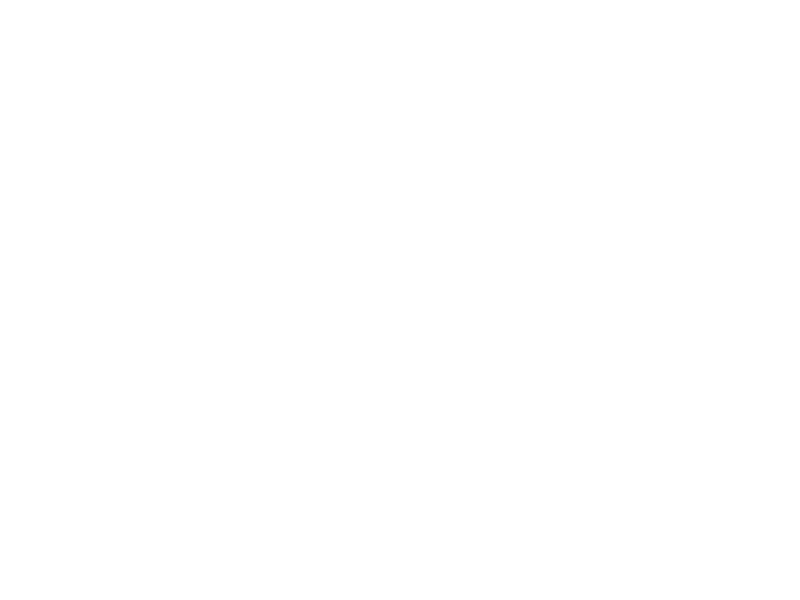

<IPython.core.display.Javascript object>


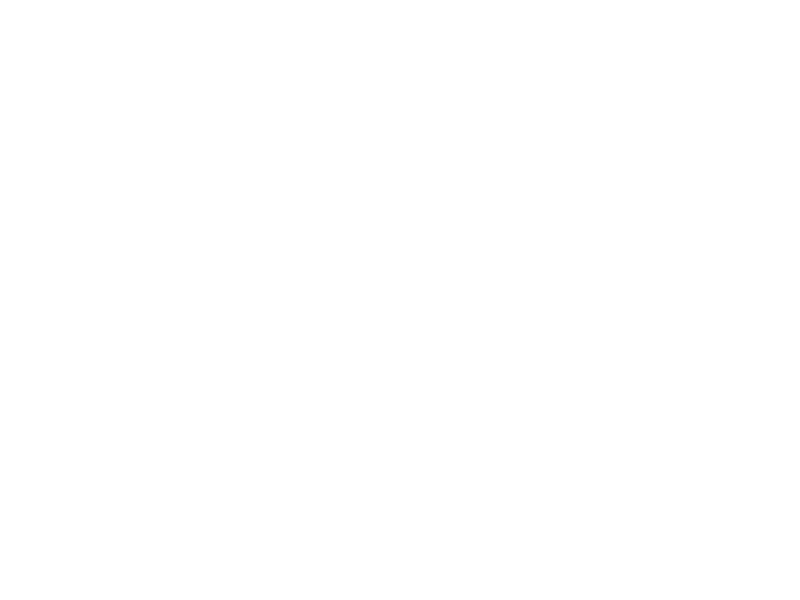

<IPython.core.display.Javascript object>


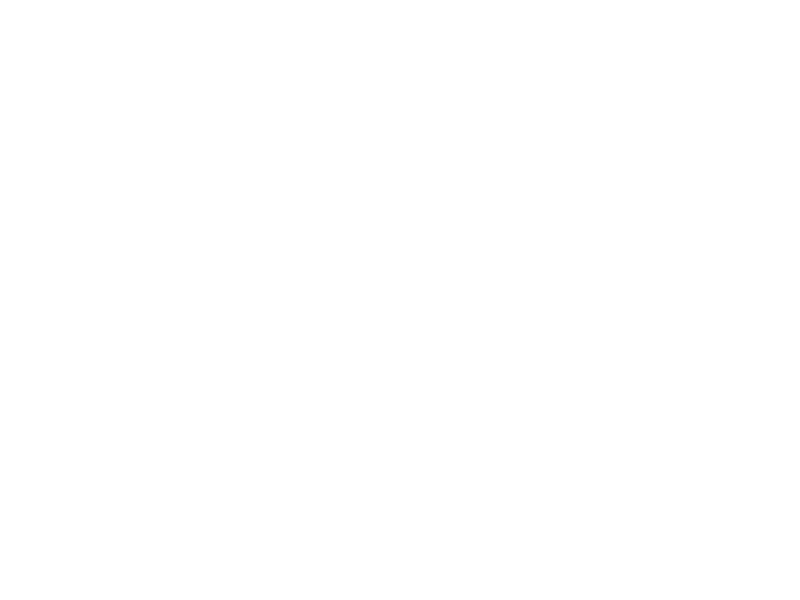

<IPython.core.display.Javascript object>


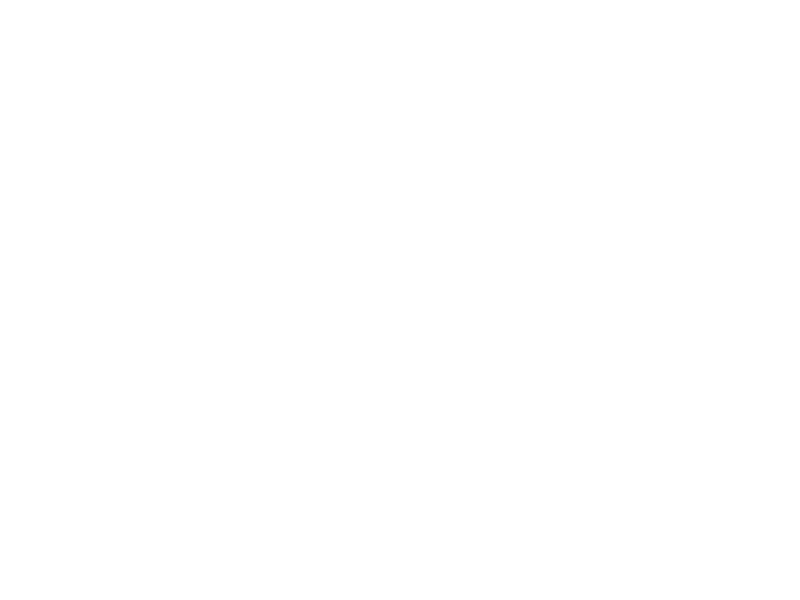

<IPython.core.display.Javascript object>


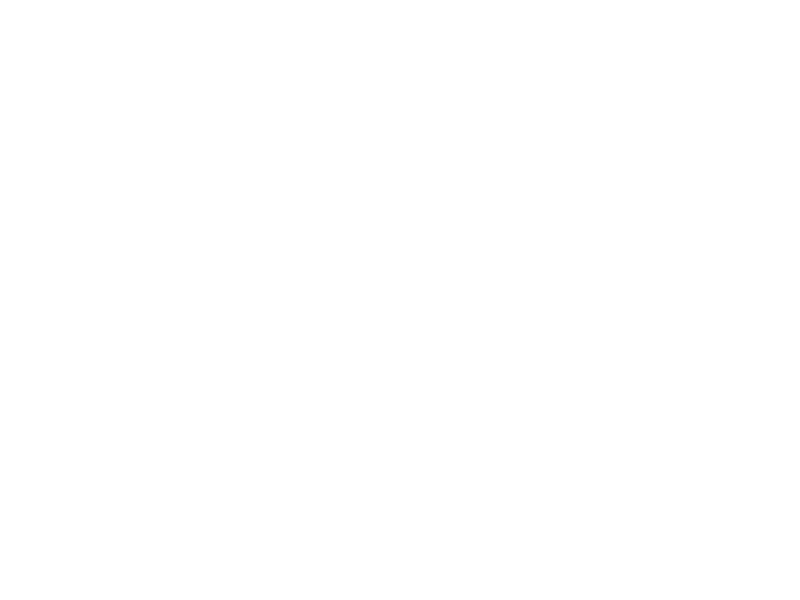

<IPython.core.display.Javascript object>


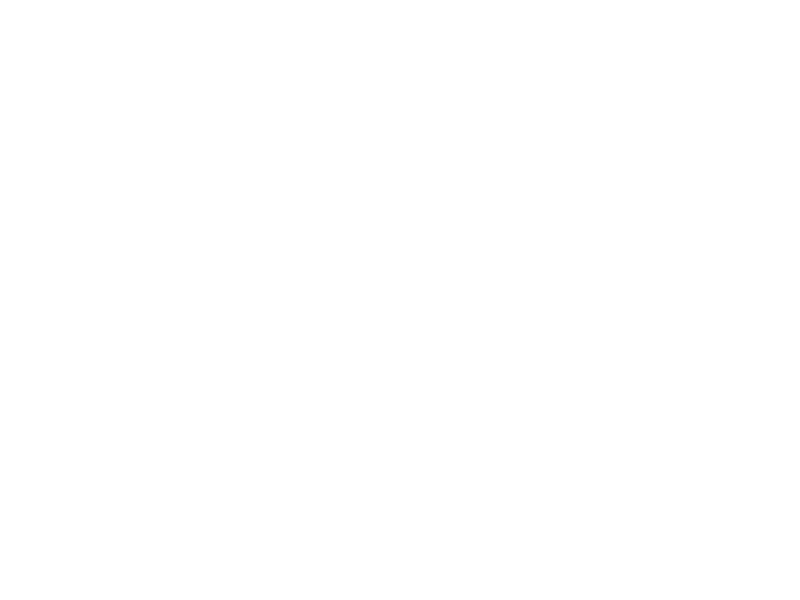

In [121]:
Nevents=np.random.randint(0,1200,5)
%matplotlib notebook
plt.style.use("default")
for i in Nevents:
    v_x=vertices_x_com[i]
    v_y=vertices_y_com[i]
    v_z=vertices_z_com[i]
    v_E=vertices_E_com[i]
    v_ind=vertices_ind_com[i]
    print(sum(v_E))
    if(len(v_ind)<2):
        continue
    edges=fn.edgeBuilderNew(v_ind,v_x,v_y,v_z,v_E)
    edges = ak.flatten(edges[ak.num(edges) > 0].to_list())

    fig = plt.figure(figsize=(8,6))
    ax = fig.add_subplot(111, projection='3d')
    
    plotTrackster(fig,ax,v_x,v_y,v_z,v_E,v_ind,edges)

0.9792822524905205


<IPython.core.display.Javascript object>


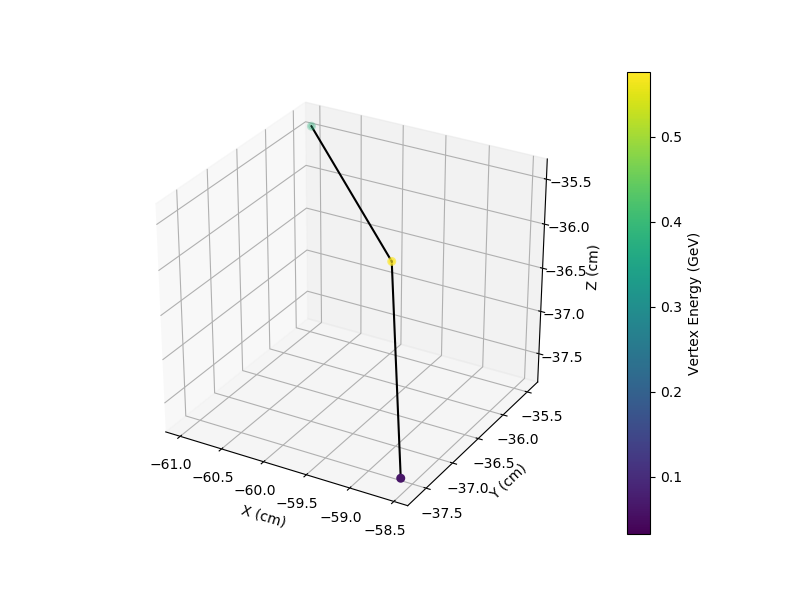

1.7090610191226006


<IPython.core.display.Javascript object>


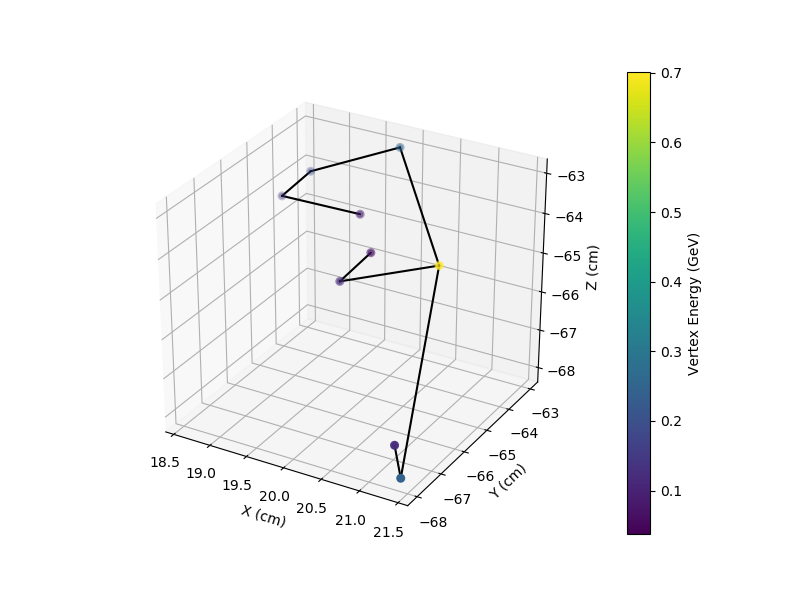

1.251556046307087


<IPython.core.display.Javascript object>


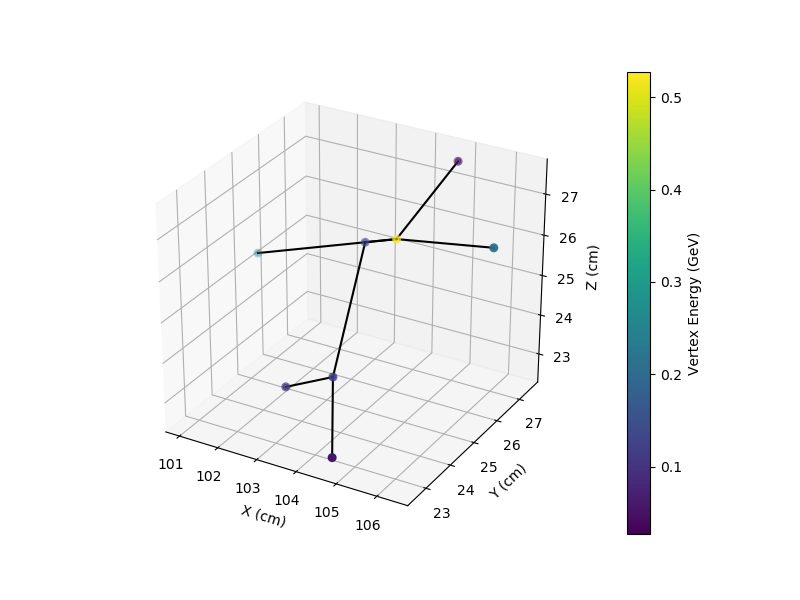

0.9639954082667828


<IPython.core.display.Javascript object>


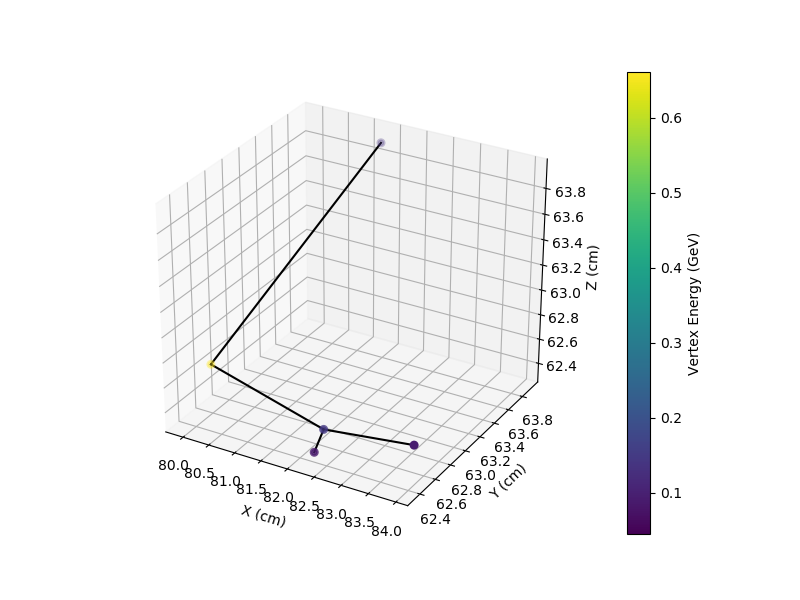

3.295588616281748


<IPython.core.display.Javascript object>


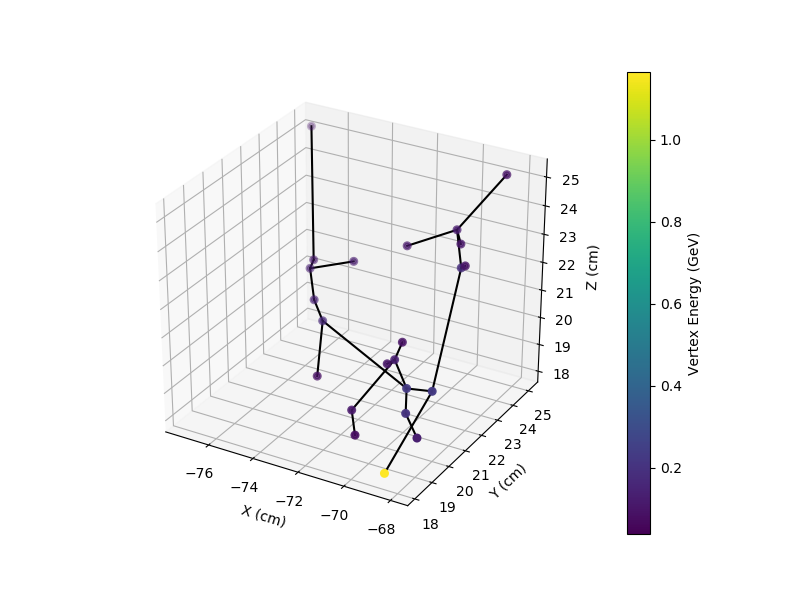

In [96]:
Nevents=np.random.randint(0,1200,5)
%matplotlib notebook
plt.style.use("default")
for i in Nevents:
    v_x=vertices_x_inc[i]
    v_y=vertices_y_inc[i]
    v_z=vertices_z_inc[i]
    v_E=vertices_E_inc[i]
    v_ind=vertices_ind_inc[i]
    print(sum(v_E))
    if(len(v_ind)<2):
        continue
    edges=fn.edgeBuilderNew(v_ind,v_x,v_y,v_z,v_E)
    edges = ak.flatten(edges[ak.num(edges) > 0].to_list())
    fig = plt.figure(figsize=(8,6))
    ax = fig.add_subplot(111, projection='3d')
    
    plotTrackster(fig,ax,v_x,v_y,v_z,v_E,v_ind,edges)

In [47]:
def delta_Eta(vertices_x,vertices_y,vertices_z):
    theta=np.arctan(np.sqrt(vertices_x**2+vertices_y**2)/vertices_z)
    #print(theta)
    #print(np.tan(theta/2))
    eta=-np.log(np.tan(theta/2))
    #print(eta)
    return eta

def delta_Phi(vertices_x,vertices_y):
    phi=np.arctan2(vertices_y,vertices_x)
    
    return phi

def delta_eta_phi(vertices_x,vertices_y,vertices_z,vertices_E):
    Phi=delta_Phi(vertices_x,vertices_y)
    Eta=delta_Eta(vertices_x,vertices_y,vertices_z)

    tr_bary_eta=sum(Eta*vertices_E/sum(vertices_E))
    tr_bary_phi=sum(Phi*vertices_E/sum(vertices_E))

    dR=np.sqrt((Eta-tr_bary_eta)**2+(Phi-tr_bary_phi)**2)
    #barycenter_R=np.sqrt(barycenter_eta**2+barycenter_phi**2)
    return np.mean(dR)

def delta_eta_phi_EW(vertices_x,vertices_y,vertices_z,vertices_E):
    Phi=delta_Phi(vertices_x,vertices_y)
    Eta=delta_Eta(vertices_x,vertices_y,vertices_z)
    tr_bary_eta=sum(Eta*vertices_E/sum(vertices_E))
    tr_bary_phi=sum(Phi*vertices_E/sum(vertices_E))
    dR=np.sqrt((Eta-tr_bary_eta)**2+(Phi-tr_bary_phi)**2)
    #barycenter_R=np.sqrt(barycenter_eta**2+barycenter_phi**2)
    return np.mean(dR*vertices_E)/sum(vertices_E)

In [48]:
comShowerShapes=[]
comLongestPaths=[]
comLongestPathsFirstNode=[]
comCenParams=[]

N = len(vertices_ind_com)
#N_tr=10000
print(N)

for tr in range(N):
    v_ind=vertices_ind_com[tr]
    v_x=vertices_x_com[tr]
    v_y=vertices_y_com[tr]
    v_z=vertices_z_com[tr]
    v_E=vertices_E_com[tr]

    if(sum(v_ind)<2):
        continue
    edges_1 = fn.edgeBuilderNew(
        v_ind,
        v_x, 
        v_y, 
        v_z, 
        v_E,
        1
    )
    edges_1 = ak.flatten(edges_1[ak.num(edges_1) > 0].to_list())

    c_nxpr_dir=fn.nXCentralityPageRank(v_ind,edges_1,True)
    c_nxpr_undir=fn.nXCentralityPageRank(v_ind,edges_1,False)
    centrality=c_nxpr_undir
    comLongestPaths.append([fn.longestPathSource(v_ind,edges_1,centrality),fn.longestPathSource(v_ind,edges_1,c_nxpr_dir,True)])

    comLongestPathsFirstNode.append([fn.longestPathInitialNode(v_ind,edges_1),fn.longestPathInitialNode(v_ind,edges_1,True)])

    comCenParams.append([np.mean(centrality),np.std(centrality)
                     ,scipy.stats.skew(centrality),scipy.stats.kurtosis(centrality)])

    comShowerShapes.append([
        fn.ld(v_z,v_E),
        fn.sd(v_z,v_E),
        fn.delta_R(v_x,v_y,v_z,v_E),
        fn.delta_RT(v_x,v_y,v_E),
        fn.delta_RT(v_x,v_y,v_E,True),
        ak.sum(v_E),
        fn.maxE_z(v_z,v_E),
        fn.maxAbsZ(v_z),
        fn.delta_RT_std(v_x,v_y,v_E)
        ,delta_eta_phi(v_x,v_y,v_z,v_E)
        ,delta_eta_phi_EW(v_x,v_y,v_z,v_E),
        np.mean(v_z),
        np.mean(v_z)/sum(v_E),
        np.mean(v_z)/np.log(sum(v_E)),
        np.mean(v_z)/(sum(v_E))**(1/4)
    ])



1385


In [49]:
incShowerShapes=[]
incLongestPaths=[]
incLongestPathsFirstNode=[]
incCenParams=[]

N = len(vertices_ind_inc)
#N_tr=10000
print(N)

for tr in range(N):
    v_ind=vertices_ind_inc[tr]
    v_x=vertices_x_inc[tr]
    v_y=vertices_y_inc[tr]
    v_z=vertices_z_inc[tr]
    v_E=vertices_E_inc[tr]

    if(sum(v_ind)<2):
        continue
    edges_1 = fn.edgeBuilderNew(
        v_ind,
        v_x, 
        v_y, 
        v_z, 
        v_E,
        1
    )
    edges_1 = ak.flatten(edges_1[ak.num(edges_1) > 0].to_list())

    c_nxpr_dir=fn.nXCentralityPageRank(v_ind,edges_1,True)
    c_nxpr_undir=fn.nXCentralityPageRank(v_ind,edges_1,False)
    centrality=c_nxpr_undir
    incLongestPaths.append([fn.longestPathSource(v_ind,edges_1,centrality),fn.longestPathSource(v_ind,edges_1,c_nxpr_dir,True)])

    incLongestPathsFirstNode.append([fn.longestPathInitialNode(v_ind,edges_1),fn.longestPathInitialNode(v_ind,edges_1,True)])

    incCenParams.append([np.mean(centrality),np.std(centrality)
                     ,scipy.stats.skew(centrality),scipy.stats.kurtosis(centrality)])

    incShowerShapes.append([
        fn.ld(v_z,v_E),
        fn.sd(v_z,v_E),
        fn.delta_R(v_x,v_y,v_z,v_E),
        fn.delta_RT(v_x,v_y,v_E),
        fn.delta_RT(v_x,v_y,v_E,True),
        ak.sum(v_E),
        fn.maxE_z(v_z,v_E),
        fn.maxAbsZ(v_z),
        fn.delta_RT_std(v_x,v_y,v_E)
        ,delta_eta_phi(v_x,v_y,v_z,v_E)
        ,delta_eta_phi_EW(v_x,v_y,v_z,v_E),
        np.mean(v_z),
        np.mean(v_z)/(sum(v_E)),
        np.mean(v_z)/np.log(sum(v_E)),
        np.mean(v_z)/(sum(v_E))**(1/4)
    ])



2000


In [50]:
comShowerShapes=np.asarray(comShowerShapes)
incShowerShapes=np.asarray(incShowerShapes)
comLongestPaths=np.asarray(comLongestPaths)
incLongestPaths=np.asarray(incLongestPaths)
comLongestPathsFirstNode=np.asarray(comLongestPathsFirstNode)
incLongestPathsFirstNode=np.asarray(incLongestPathsFirstNode)
comCenParams=np.asarray(comCenParams)
incCenParams=np.asarray(incCenParams)

In [28]:
def plotShowerShapes(completeShowerShapes,incompleteShowerShapes,xlabels,saveFileNames,ranges,bins=50):
    %matplotlib inline
    if(type(bins)==int):
        bins=[bins]*len(completeShowerShapes[0])
    print(bins)
    for i in range(len(completeShowerShapes[0])):
        plt.figure(figsize=(8,6))
        if(len(ranges)>0):
            plt.hist(completeShowerShapes[:,i], histtype="step",bins=bins[i],range=ranges[i], color='b',label='Complete')
            plt.hist(incompleteShowerShapes[:,i], histtype="step",bins=bins[i],range=ranges[i], color='r',label='Incomplete')
        else:
            plt.hist(completeShowerShapes[:,i], histtype="step",bins=bins[i], color='b',label='Complete')
            plt.hist(incompleteShowerShapes[:,i], histtype="step",bins=bins[i], color='r',label='Incomplete')
        plt.legend()
        plt.ylabel("N",fontsize=20)
        plt.xlabel(xlabels[i],fontsize=20)
        #plt.xlim(min(completeShowerShapes[:,i]-5),max(completeShowerShapes[:,i]+5))
        if i in [1,5,6,7,9,10,11]:
            print("test")
            plt.savefig(folder+saveFileNames[i]+".png")
        plt.show()

['LowEIncVsCom_ld', 'LowEIncVsCom_sd', 'LowEIncVsCom_delta_R', 'LowEIncVsCom_delta_RT', 'LowEIncVsCom_delta_RT_Eweighted', 'LowEIncVsCom_Total_energy', 'LowEIncVsCom_maxE_Z_position', 'LowEIncVsCom_maxium_Z_position', 'LowEIncVsCom_delta_R_std', 'LowEIncVsCom_delta_R', 'LowEIncVsCom_delta_R_EW', 'LowEIncVsCom_Mean_Z_position', 'LowEIncVsCom_Mean_Z_E_tot', 'LowEIncVsCom_Mean_Z_log(E_tot)', 'LowEIncVsCom_Mean_Z_E_tot^(1/4)']
[50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50]


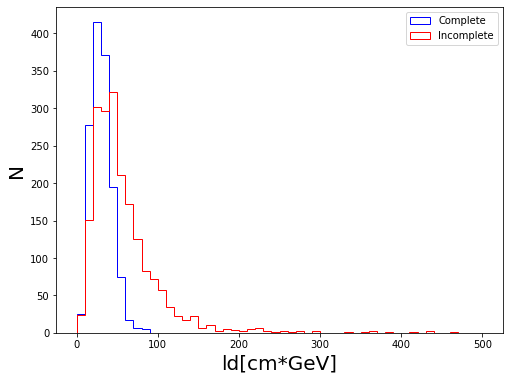

test


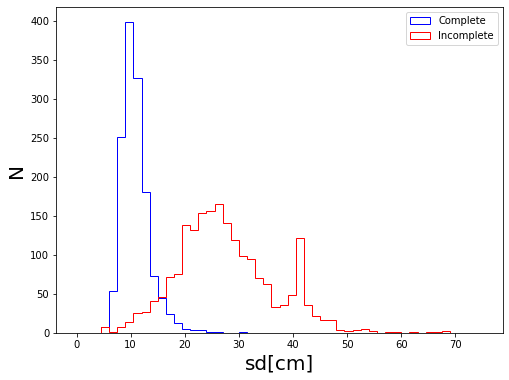

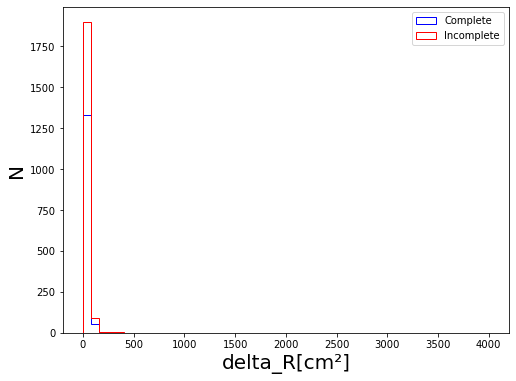

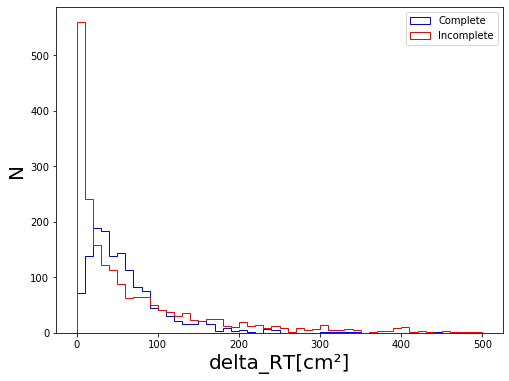

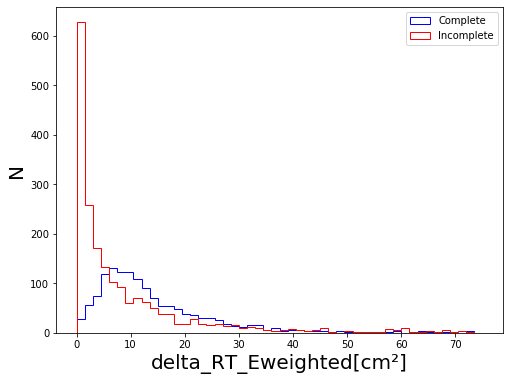

test


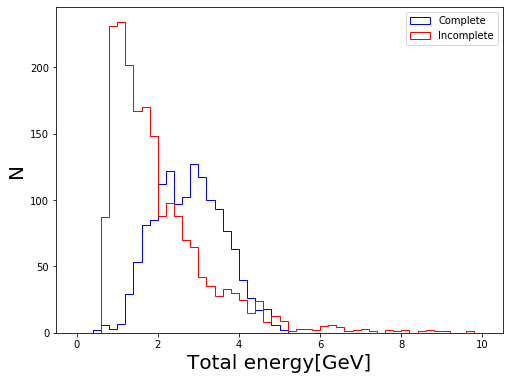

test


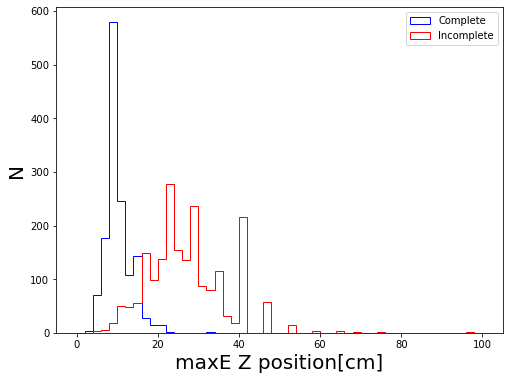

test


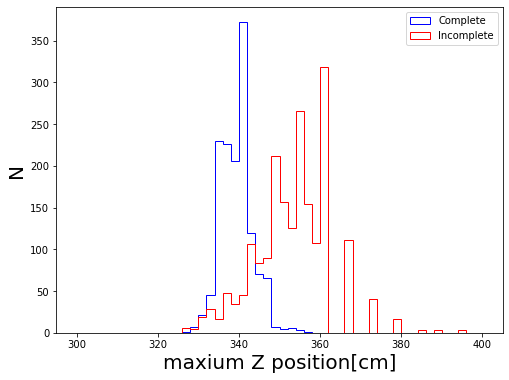

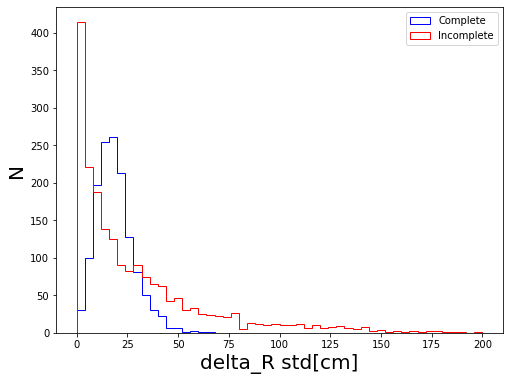

test


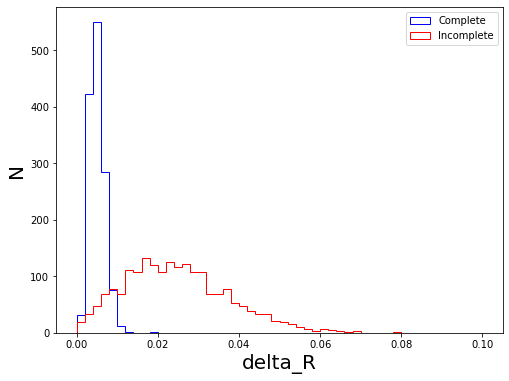

test


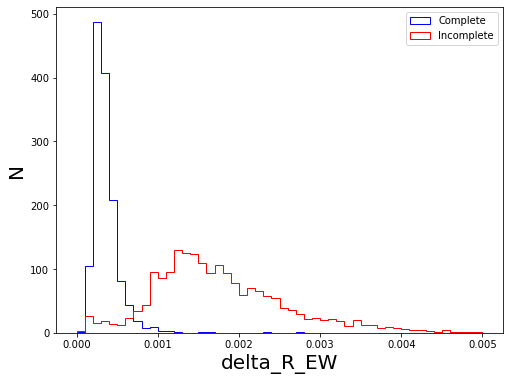

test


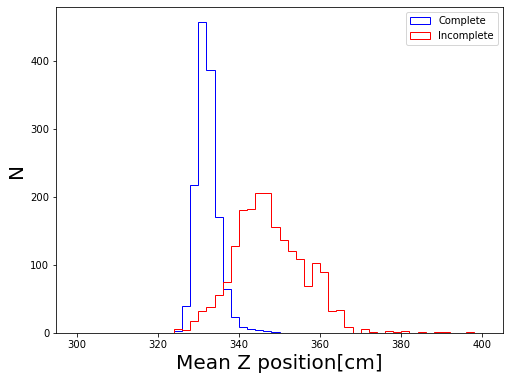

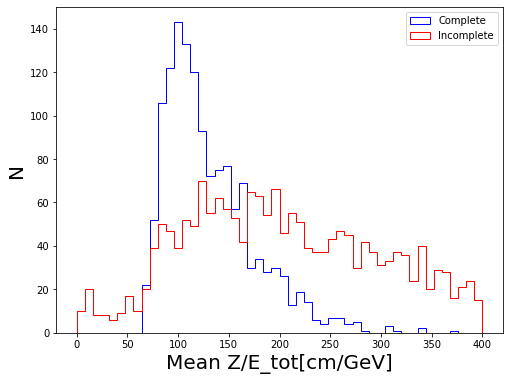

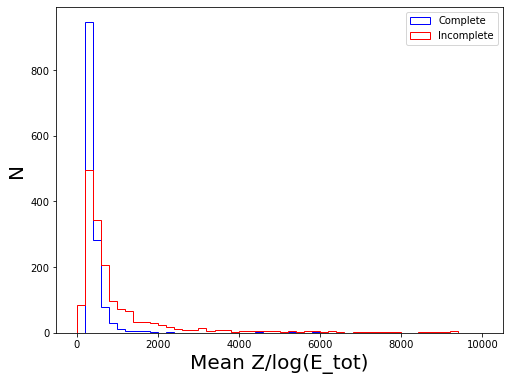

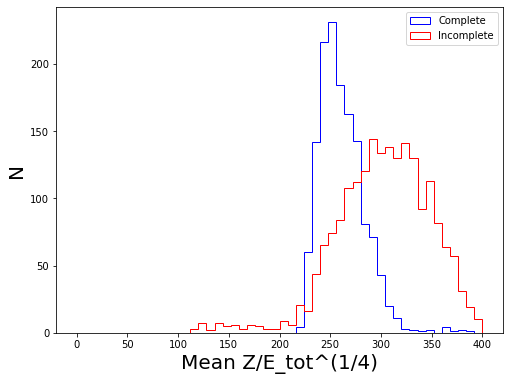

In [53]:
xlabels=["ld[cm*GeV]","sd[cm]","delta_R[cm²]","delta_RT[cm²]","delta_RT_Eweighted[cm²]","Total energy[GeV]","maxE Z position[cm]","maxium Z position[cm]","delta_R std[cm]","delta_R","delta_R_EW","Mean Z position[cm]","Mean Z/E_tot[cm/GeV]","Mean Z/log(E_tot)","Mean Z/E_tot^(1/4)"]
xlabels2=["ld","sd","delta_R","delta_RT","delta_RT_Eweighted","Total energy","maxE Z position","maxium Z position","delta_R_std","delta_R","delta_R_EW","Mean Z position","Mean Z_E_tot","Mean Z_log(E_tot)","Mean Z_E_tot^(1/4)"]

newList=[("LowEIncVsCom_"+i.replace(" ","_")) for i in xlabels2]
print(newList)
ranges=[(0,500),(0,75),(0,4000),(0,500),(0,75),(0,10),(0,100),(300,400),(0,200),(0,0.1),(0,0.005),(300,400),(0,400),(0,10000),(0,400)]
plotShowerShapes(comShowerShapes,incShowerShapes,xlabels,newList,ranges)

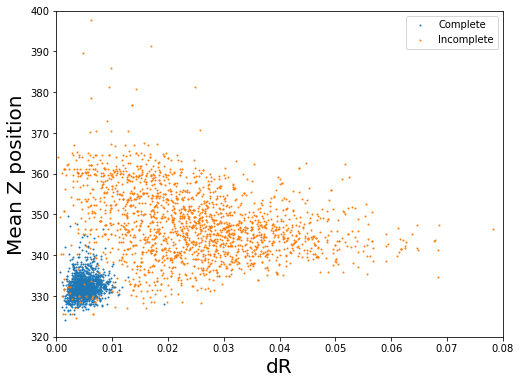

In [56]:
%matplotlib inline
plt.figure(figsize=(8,6))
plt.scatter(comShowerShapes[:,9],comShowerShapes[:,11],label="Complete",s=1)
plt.scatter(incShowerShapes[:,9],incShowerShapes[:,11],label="Incomplete",s=1)
plt.xlim(0,0.08)
plt.ylim(320,400)
plt.xlabel("dR",fontsize=20)
plt.ylabel("Mean Z position",fontsize=20)
plt.legend()
plt.show()

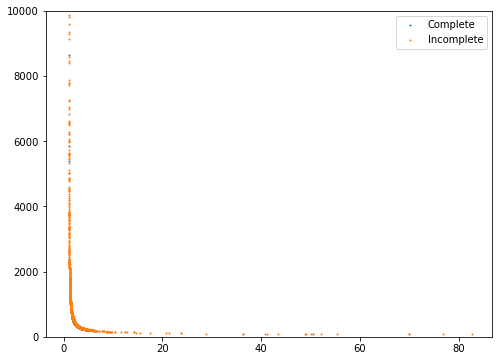

In [79]:
%matplotlib inline
plt.figure(figsize=(8,6))
plt.scatter(comShowerShapes[:,5],comShowerShapes[:,13],label="Complete",s=1)
plt.scatter(incShowerShapes[:,5],incShowerShapes[:,13],label="Incomplete",s=1)
#plt.xlim(0,10)
plt.ylim(0,10000)
plt.legend()
plt.show()

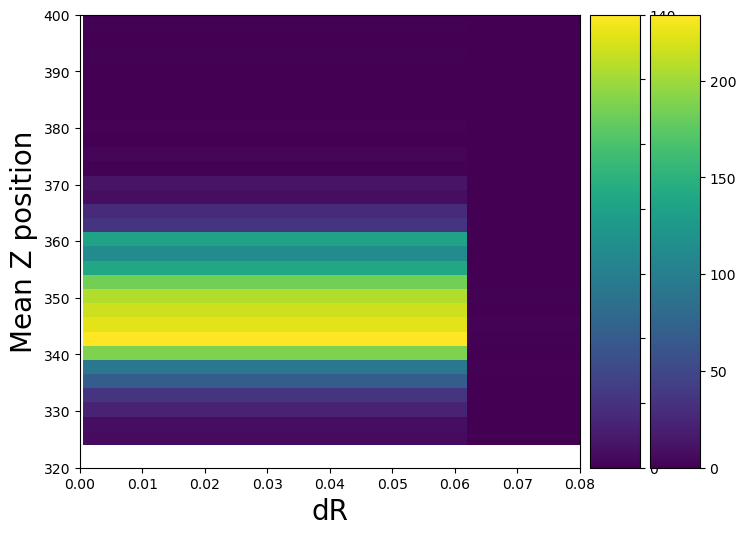

In [87]:


heatmap, xedges, yedges = np.histogram2d(comShowerShapes[:,9],comShowerShapes[:,11],bins=50)

extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]
fig=plt.figure(figsize=(8,6),dpi=100)
plt.clf()
ax=plt.gca()
im=ax.imshow(heatmap.T, extent=extent, origin='lower',aspect='auto')
#plt.title("Complete max path length normalized",fontsize=20)
plt.xlim(0,0.08)
plt.ylim(320,400)
plt.xlabel("dR",fontsize=20)
plt.ylabel("Mean Z position",fontsize=20)
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="10%", pad=0.1)
   
plt.colorbar(im, cax=cax)

heatmap, xedges, yedges = np.histogram2d(incShowerShapes[:,9],incShowerShapes[:,11],bins=50)

extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]
im=ax.imshow(heatmap.T, extent=extent, origin='lower',aspect='auto',label="Incomplete")
cax = divider.append_axes("right", size="10%", pad=0.1)
plt.colorbar(im, cax=cax)
plt.xlim(0,)
plt.show()
#plt.(np.arange(1,len(comCenProfArray[i])+1)/comNVerticesList[i],comCenProfArray[i])


(array([   5.,   51.,   50.,  249.,  615., 1184., 1966., 2611., 2939.,
        1615., 3039., 2641., 1023., 1804., 1217.,  885.,    0.,  155.,
           0.,   57.,    0.,   23.,    0.,    0.,   13.,    0.,    6.,
           0.,    6.,    0.]),
 array([320.        , 322.66666667, 325.33333333, 328.        ,
        330.66666667, 333.33333333, 336.        , 338.66666667,
        341.33333333, 344.        , 346.66666667, 349.33333333,
        352.        , 354.66666667, 357.33333333, 360.        ,
        362.66666667, 365.33333333, 368.        , 370.66666667,
        373.33333333, 376.        , 378.66666667, 381.33333333,
        384.        , 386.66666667, 389.33333333, 392.        ,
        394.66666667, 397.33333333, 400.        ]),
 <a list of 1 Patch objects>)

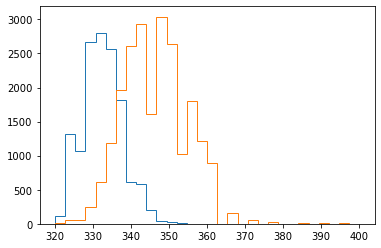

In [131]:
plt.hist(ak.flatten(vertices_z_com),histtype="step",range=(320,400),bins=30)
plt.hist(ak.flatten(vertices_z_inc),histtype="step",range=(320,400),bins=30)

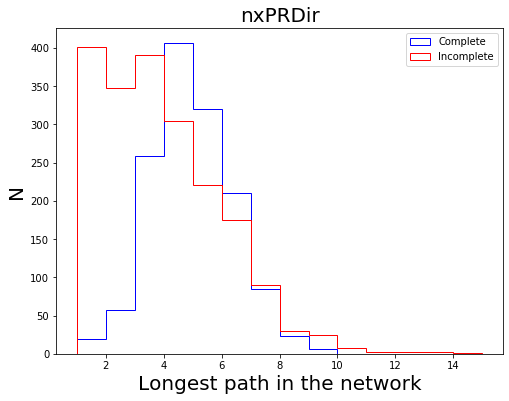

In [152]:
%matplotlib inline
plt.figure(figsize=(8,6))
n, bins, patches = plt.hist(comLongestPaths[:,0], bins=(max(comLongestPaths[:,0])-min(comLongestPaths[:,0])), color='b', histtype="step",label='Complete')
plt.hist(incLongestPaths[:,0], bins=(max(incLongestPaths[:,0])-min(incLongestPaths[:,0])), color='r', histtype="step",label='Incomplete')
plt.legend()
plt.ylabel("N",fontsize=20)
plt.xlabel("Longest path in the network",fontsize=20)
plt.title("nxPRUnDir",fontsize=20)
plt.show()

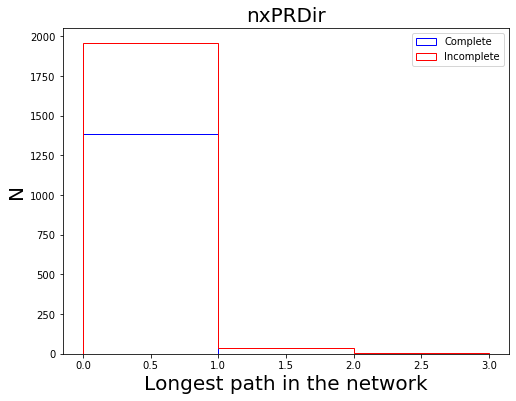

In [153]:
%matplotlib inline
plt.figure(figsize=(8,6))
n, bins, patches = plt.hist(comLongestPaths[:,1], bins=(max(comLongestPaths[:,1])-min(comLongestPaths[:,1])), color='b', histtype="step",label='Complete')
plt.hist(incLongestPaths[:,1], bins=(max(incLongestPaths[:,1])-min(incLongestPaths[:,1])), color='r', histtype="step",label='Incomplete')
plt.legend()
plt.ylabel("N",fontsize=20)
plt.xlabel("Longest path in the network",fontsize=20)
plt.title("nxPRDir",fontsize=20)
plt.show()

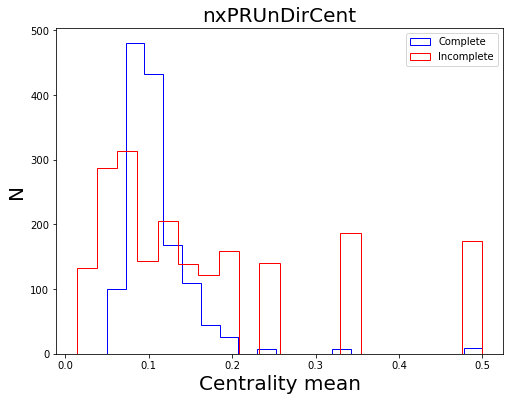

In [154]:
%matplotlib inline
centralityName="nxPRUnDirCent"
plt.figure(figsize=(8,6))
n, bins, patches = plt.hist(comCenParams[:,0], bins=20, color='b', histtype="step",label='Complete')
plt.hist(incCenParams[:,0], bins=20, color='r', histtype="step",label='Incomplete')
plt.legend()
plt.ylabel("N",fontsize=20)
plt.xlabel("Centrality mean",fontsize=20)
plt.title(centralityName,fontsize=20)
plt.show()

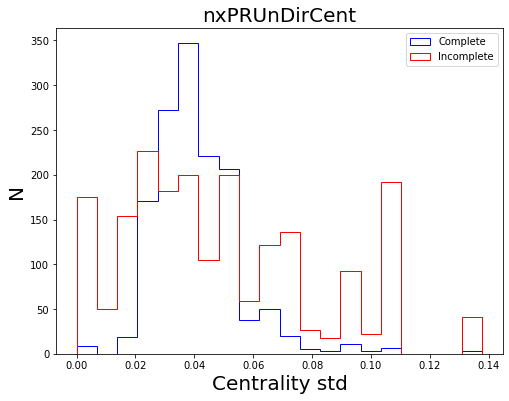

In [155]:
%matplotlib inline

plt.figure(figsize=(8,6))
n, bins, patches = plt.hist(comCenParams[:,1], bins=20, color='b', histtype="step",label='Complete')
plt.hist(incCenParams[:,1], bins=20, color='r', histtype="step",label='Incomplete')
plt.legend()
plt.ylabel("N",fontsize=20)
plt.xlabel("Centrality std",fontsize=20)
plt.title(centralityName,fontsize=20)
plt.show()

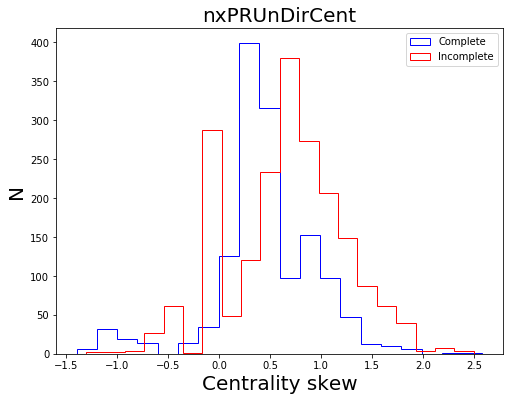

In [156]:
%matplotlib inline

plt.figure(figsize=(8,6))
n, bins, patches = plt.hist(comCenParams[:,2], bins=20, color='b', histtype="step",label='Complete')
plt.hist(incCenParams[:,2], bins=20, color='r', histtype="step",label='Incomplete')
plt.legend()
plt.ylabel("N",fontsize=20)
plt.xlabel("Centrality skew",fontsize=20)
plt.title(centralityName,fontsize=20)
plt.show()

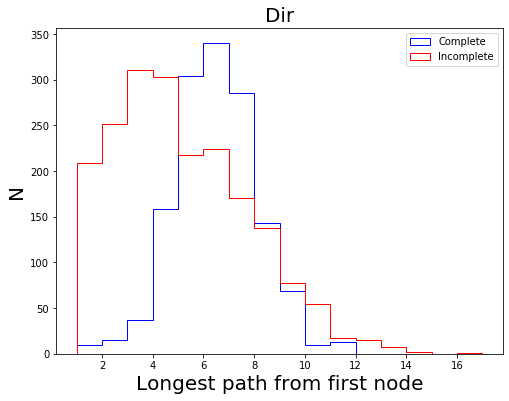

In [159]:
%matplotlib inline

plt.figure(figsize=(8,6))
n, bins, patches = plt.hist(comLongestPathsFirstNode[:,0], bins=(max(comLongestPathsFirstNode[:,0])-min(comLongestPathsFirstNode[:,0])), color='b', histtype="step",label='Complete')
plt.hist(incLongestPathsFirstNode[:,0], bins=(max(incLongestPathsFirstNode[:,0])-min(incLongestPathsFirstNode[:,0])), color='r', histtype="step",label='Incomplete')
plt.legend()
plt.ylabel("N",fontsize=20)
plt.xlabel("Longest path from first node",fontsize=20)
plt.title("Dir",fontsize=20)
plt.show()

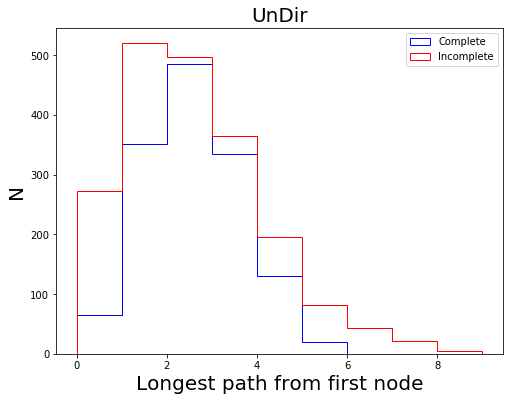

In [161]:
%matplotlib inline

plt.figure(figsize=(8,6))
n, bins, patches = plt.hist(comLongestPathsFirstNode[:,1], bins=(max(comLongestPathsFirstNode[:,1])-min(comLongestPathsFirstNode[:,1])), color='b', histtype="step",label='Complete')
plt.hist(incLongestPathsFirstNode[:,1], bins=(max(incLongestPathsFirstNode[:,1])-min(incLongestPathsFirstNode[:,1])), color='r', histtype="step",label='Incomplete')
plt.legend()
plt.ylabel("N",fontsize=20)
plt.xlabel("Longest path from first node",fontsize=20)
plt.title("UnDir",fontsize=20)
plt.show()

In [179]:
#evt=1
#tr=1

comCenProfArray=[]
comNVerticesList=[]
N_tr=len(vertices_ind_com)
for tr in range(N_tr):
    if(len(vertices_ind_com[tr])<4):
        continue
    TrNet=net.Network(vertices_ind_com[tr],vertices_x_com[tr],vertices_y_com[tr],
                             vertices_z_com[tr],vertices_E_com[tr])
    edges_1 = TrNet.edgeBuilderNew()
    edges_1 = ak.flatten(edges_1[ak.num(edges_1) > 0].to_list())
    #c_pr_undir=TrNet.centralityPageRank(vertices_indexes_com_g[tr],edges_1,0.85,False)
    #c_nx_pr_undir=TrNet.nXCentralityPageRank(vertices_indexes_com_g[tr],edges_1,0.85,False)
    #c_nx_eigen_undir=TrNet.nXCentralityEigen(vertices_indexes_com_g[tr],edges_1,False)
    c_nx_pr_undir=TrNet.nXCentralityPageRank(vertices_ind_com[tr],edges_1,False)
    #i_cen_max=np.argmax(c_pr_undir)
    adjMatrix=TrNet.adjM(vertices_ind_com[tr],edges_1)

    cenProfList=TrNet.centralityProf(adjMatrix,c_nx_pr_undir)
    comCenProfArray.append(cenProfList)
    comNVerticesList.append(len(vertices_ind_com[tr]))

In [180]:
incCenProfArray=[]
incNVerticesList=[]
N_tr=len(vertices_ind_inc)
for tr in range(N_tr):
    if(len(vertices_ind_inc[tr])<4):
        continue
    TrNet=net.Network(vertices_ind_inc[tr],vertices_x_inc[tr],vertices_y_inc[tr],
                             vertices_z_inc[tr],vertices_E_inc[tr])
    edges_1 = TrNet.edgeBuilderNew()
    edges_1 = ak.flatten(edges_1[ak.num(edges_1) > 0].to_list())
    #c_pr_undir=TrNet.centralityPageRank(vertices_indexes_inc_g[tr],edges_1,0.85,False)
    c_nx_pr_undir=TrNet.nXCentralityPageRank(vertices_ind_inc[tr],edges_1,0.85,False)
    #c_nx_eigen_undir=TrNet.nXCentralityEigen(vertices_indexes_inc_g[tr],edges_1,False)
    #c_nx_katz_undir=TrNet.nXCentralityKatz(vertices_indexes_inc_g[tr],edges_1,False)
    adjMatrix=TrNet.adjM(vertices_ind_inc[tr],edges_1)

    cenProfList=TrNet.centralityProf(adjMatrix,c_nx_pr_undir)
    incCenProfArray.append(cenProfList)
    incNVerticesList.append(len(vertices_ind_inc[tr]))

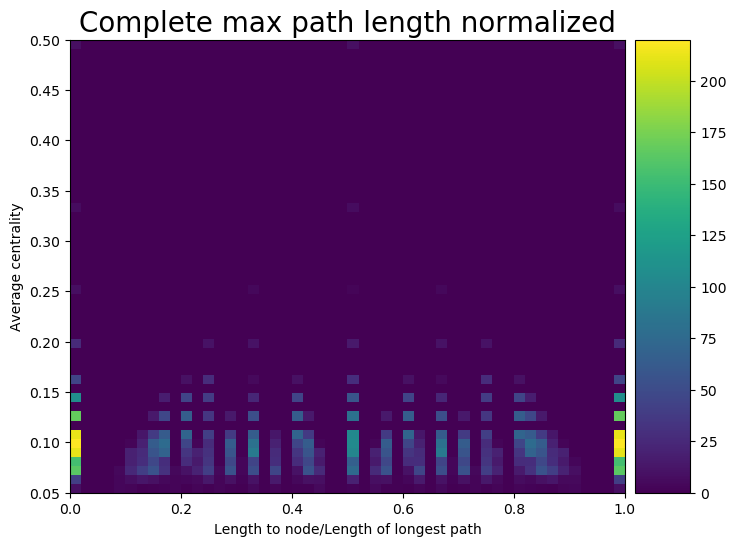

In [181]:


xValues=[]
#print(len(comCenProfArray))
for i in range(len(comCenProfArray)):
    xValues.append(np.arange(0,(len(comCenProfArray[i])))/(len(comCenProfArray[i])-1))
#print(xValues)
heatmap, xedges, yedges = np.histogram2d([x for xs in xValues for x in xs]
                                         ,[x for xs in comCenProfArray for x in xs],bins=50)

extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]
fig=plt.figure(figsize=(8,6),dpi=100)
plt.clf()
ax=plt.gca()
im=ax.imshow(heatmap.T, extent=extent, origin='lower',aspect='auto')
plt.title("Complete max path length normalized",fontsize=20)
plt.xlabel("Length to node/Length of longest path")
plt.ylabel("Average centrality")

divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="10%", pad=0.1)
   
plt.colorbar(im, cax=cax)
plt.show()
#plt.(np.arange(1,len(comCenProfArray[i])+1)/comNVerticesList[i],comCenProfArray[i])


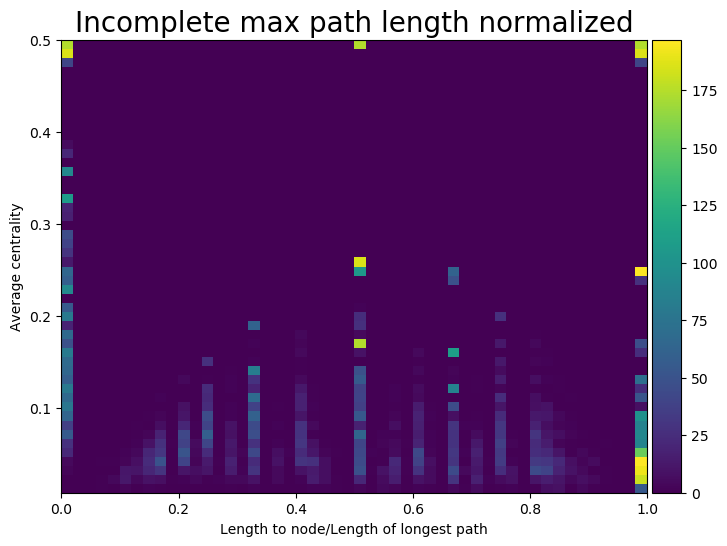

In [182]:


xValues=[]
#print(len(comCenProfArray))
for i in range(len(incCenProfArray)):
    xValues.append(np.arange(0,(len(incCenProfArray[i])))/(len(incCenProfArray[i])-1))
#print(xValues)
heatmap, xedges, yedges = np.histogram2d([x for xs in xValues for x in xs]
                                         ,[x for xs in incCenProfArray for x in xs],bins=50)

extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]
fig=plt.figure(figsize=(8,6),dpi=100)
plt.clf()
ax=plt.gca()
im=ax.imshow(heatmap.T, extent=extent, origin='lower',aspect='auto')
plt.title("Incomplete max path length normalized",fontsize=20)
plt.xlabel("Length to node/Length of longest path")
plt.ylabel("Average centrality")

divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.05)
   
plt.colorbar(im, cax=cax)
plt.show()
#plt.(np.arange(1,len(comCenProfArray[i])+1)/comNVerticesList[i],comCenProfArray[i])


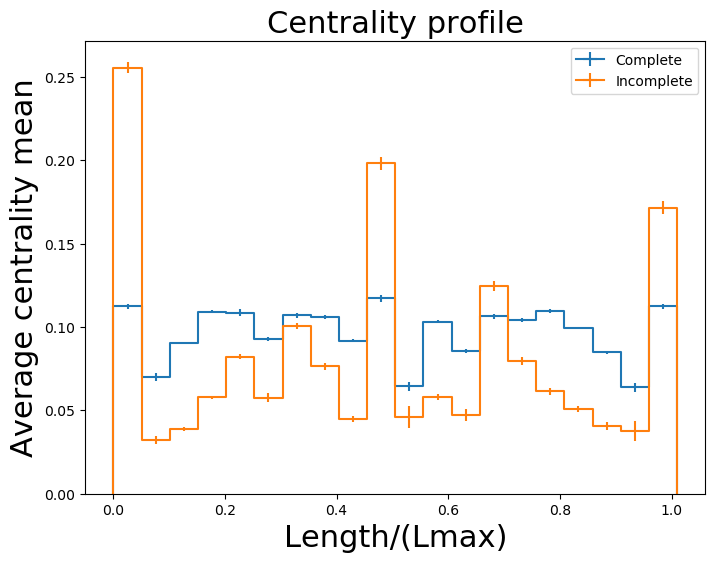

In [183]:


xValues=[]
#print(len(comCenProfArray))
for i in range(len(comCenProfArray)):
    xValues.append(np.arange(0,(len(comCenProfArray[i])))/(len(comCenProfArray[i])-1))

hCom_xy = hist.Hist(
    hist.axis.Regular(20, 0, 1.01, name="x",overflow="False"), hist.axis.Regular(50, 0, 1, name="y")
).fill(x=[x for xs in xValues for x in xs],y=[x for xs in comCenProfArray for x in xs])
hpCom = hCom_xy.profile("y")


xValues=[]
#print(len(comCenProfArray))
for i in range(len(incCenProfArray)):
    xValues.append(np.arange(0,(len(incCenProfArray[i])))/(len(incCenProfArray[i])-1))

hInc_xy = hist.Hist(
    hist.axis.Regular(20, 0, 1.01, name="x",overflow="False"), hist.axis.Regular(50, 0, 1, name="y")
).fill(x=[x for xs in xValues for x in xs],y=[x for xs in incCenProfArray for x in xs])
#print(h_xy)
hpInc = hInc_xy.profile("y")

fig=plt.figure(figsize=(8,6),dpi=100)
hpCom.plot(label='Complete')
hpInc.plot(label='Incomplete')
plt.title("Centrality profile",fontsize=22)
plt.xlabel("Length/(Lmax)",fontsize=22)
plt.ylabel("Average centrality mean",fontsize=22)
plt.legend()
plt.show()

In [184]:
for i in range(len(incCenProfArray)):
    for j in incCenProfArray[i]:
        if(j>0.4):
            print(incCenProfArray[i])
            print(incNVerticesList[i])
            break

[0.5, 0.5, 0.5]
2
[0.48648582432442106, 0.2567570878377895, 0.48648582432442106]
3
[0.5, 0.5, 0.5]
2
[0.48648582432442106, 0.2567570878377895, 0.48648582432442106]
3
[0.48648582432442106, 0.2567570878377895, 0.48648582432442106]
3
[0.48648582432442106, 0.2567570878377895, 0.48648582432442106]
3
[0.4797305739863632, 0.1734231420045456, 0.4797305739863632]
4
[0.5, 0.5, 0.5]
2
[0.48648582432442106, 0.2567570878377895, 0.48648582432442106]
3
[0.5, 0.5, 0.5]
2
[0.5, 0.5, 0.5]
2
[0.48648582432442106, 0.2567570878377895, 0.48648582432442106]
3
[0.5, 0.5, 0.5]
2
[0.5, 0.5, 0.5]
2
[0.5, 0.5, 0.5]
2
[0.48648582432442106, 0.2567570878377895, 0.48648582432442106]
3
[0.5, 0.5, 0.5]
2
[0.48648582432442106, 0.2567570878377895, 0.48648582432442106]
3
[0.4797305739863632, 0.1734231420045456, 0.4797305739863632]
4
[0.5, 0.5, 0.5]
2
[0.5, 0.5, 0.5]
2
[0.5, 0.5, 0.5]
2
[0.5, 0.5, 0.5]
2
[0.47973057398636326, 0.17342314200454564, 0.47973057398636326]
4
[0.48648582432442106, 0.2567570878377895, 0.4864858243